<a href="https://colab.research.google.com/github/walaabouzar/Breast-Cancer-Classification-with-ML-Models/blob/main/Breast_Cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Dataset Tutorial**

**1. Introduction**

The Breast Cancer dataset is a classic binary classification problem. It contains 569 samples with 30 features, such as radius, texture, perimeter, etc. The goal is to predict whether a tumor is malignant (1) or benign (0).

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:

print("Feature names:")
print(data.feature_names)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# 1. Decision Tree
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
# 2. Random Forest
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

Random Forest:
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
# 3. XGBoost
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)

XGBoost:
Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 4. K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# **Hyperparameter Tuning**

# ***Decision Tree***

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Parameter grid
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [ ]:
# GridSearchCV with accuracy scoring
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5, # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,   # Use all available CPU cores
    verbose=2
)


In [ ]:
# Fit and tune
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
# Best model
best_dt_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9246518987341773


In [ ]:
# Evaluate on test set
y_pred = best_dt_model.predict(X_test)
print("\nTest set evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Test set evaluation:
Accuracy: 0.9532163742690059

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94        63
   Malignant       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# **2. Random Forest**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 15],   # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples in a leaf
}

In [ ]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # Use accuracy
    n_jobs=-1,  # Parallel processing
    verbose=2
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9572468354430379


In [ ]:
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Test Set Evaluation:
Accuracy: 0.9707602339181286
ROC-AUC: 0.9970605526161082

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96        63
   Malignant       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# **XGboost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [3, 5, 7],               # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'subsample': [0.8, 1.0],              # Fraction of samples per tree
    'colsample_bytree': [0.8, 1.0],       # Fraction of features per tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction for splits
    'reg_lambda': [0, 0.1, 1.0]          # L2 regularization

}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy (or 'roc_auc' for imbalanced data)
    n_jobs=-1,  # Parallel processing
    verbose=2   # Print progress
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
best_xgb_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9572468354430379


In [ ]:
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Test Set Evaluation:
Accuracy: 0.9707602339181286
ROC-AUC: 0.9970605526161082

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.94      0.96        63
   Malignant       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
import time

# Measure training time for Decision Tree
start_time = time.time()
best_dt_model.fit(X_train, y_train)
dt_training_time = time.time() - start_time

# Measure training time for Random Forest
start_time = time.time()
best_rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Measure training time for XGBoost
start_time = time.time()
best_xgb_model.fit(X_train, y_train)
xgb_training_time = time.time() - start_time

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Function to evaluate a model
def evaluate_and_get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)  # For ROC curve
    return accuracy, roc_auc, fpr, tpr

# Evaluate Decision Tree
dt_accuracy, dt_roc_auc, dt_fpr, dt_tpr = evaluate_and_get_metrics(best_dt_model, X_test, y_test)

# Evaluate Random Forest
rf_accuracy, rf_roc_auc, rf_fpr, rf_tpr = evaluate_and_get_metrics(best_rf_model, X_test, y_test)

# Evaluate XGBoost
xgb_accuracy, xgb_roc_auc, xgb_fpr, xgb_tpr = evaluate_and_get_metrics(best_xgb_model, X_test, y_test)

In [ ]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [dt_accuracy, rf_accuracy, xgb_accuracy],
    "ROC AUC": [dt_roc_auc, rf_roc_auc, xgb_roc_auc],
    "Training Time (s)": [dt_training_time, rf_training_time, xgb_training_time]
})

print(comparison_df)

           Model  Accuracy   ROC AUC  Training Time (s)
0  Decision Tree  0.953216  0.936655           0.007805
1  Random Forest  0.970760  0.997061           0.315763
2        XGBoost  0.970760  0.997061           0.337280


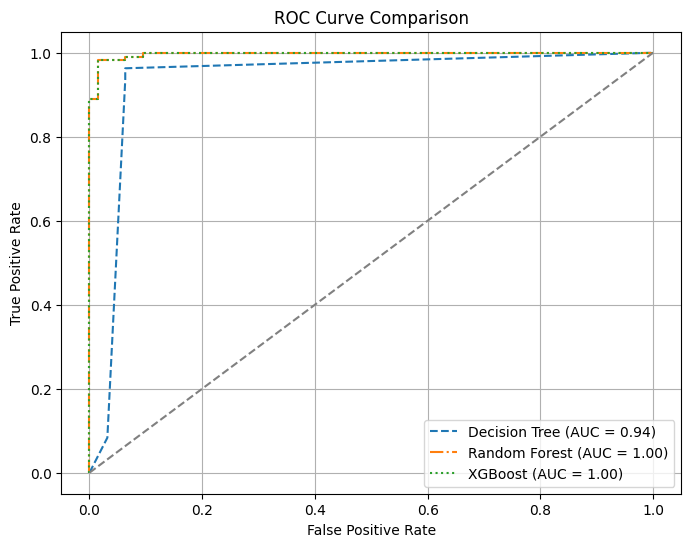

In [ ]:
import matplotlib.pyplot as plt

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_roc_auc:.2f})", linestyle="--")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})", linestyle="-.")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_roc_auc:.2f})", linestyle=":")

# Add labels and legend
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#**Feature Importance**

Feature count in X: 30

Decision Tree Top 10 Features:
        Feature  Importance
7    Feature_8    0.719701
21  Feature_22    0.119998
20  Feature_21    0.040313
23  Feature_24    0.037373
22  Feature_23    0.031252
11  Feature_12    0.024793
13  Feature_14    0.013829
24  Feature_25    0.010698
14  Feature_15    0.002044
19  Feature_20    0.000000

Random Forest Top 10 Features:
        Feature  Importance
7    Feature_8    0.138475
27  Feature_28    0.127745
22  Feature_23    0.121634
23  Feature_24    0.119309
20  Feature_21    0.070202
6    Feature_7    0.064397
2    Feature_3    0.051214
3    Feature_4    0.047101
26  Feature_27    0.038899
0    Feature_1    0.032929

XGBoost Top 10 Features:
        Feature  Importance
7    Feature_8    0.138475
27  Feature_28    0.127745
22  Feature_23    0.121634
23  Feature_24    0.119309
20  Feature_21    0.070202
6    Feature_7    0.064397
2    Feature_3    0.051214
3    Feature_4    0.047101
26  Feature_27    0.038899
0    Feature_1    0.

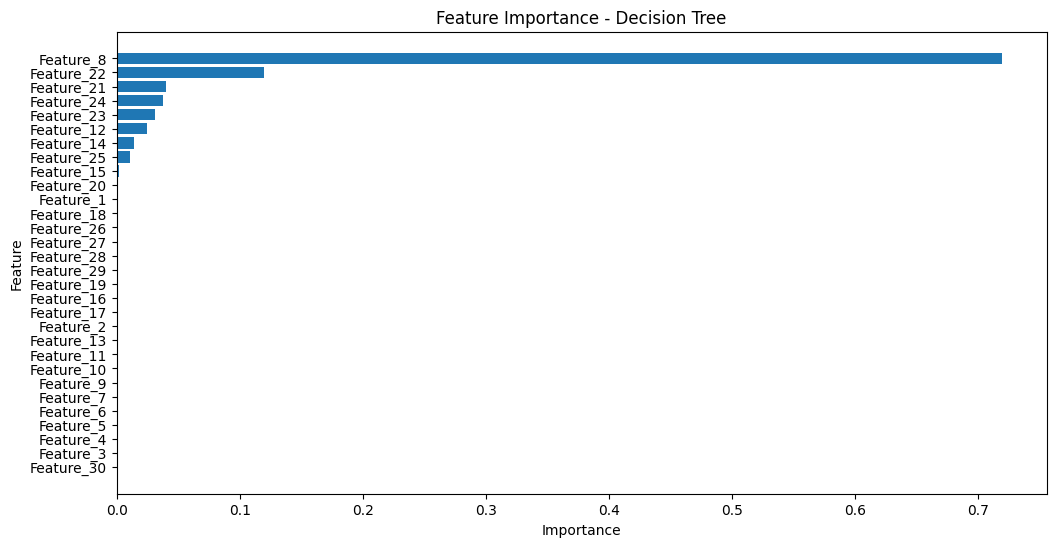

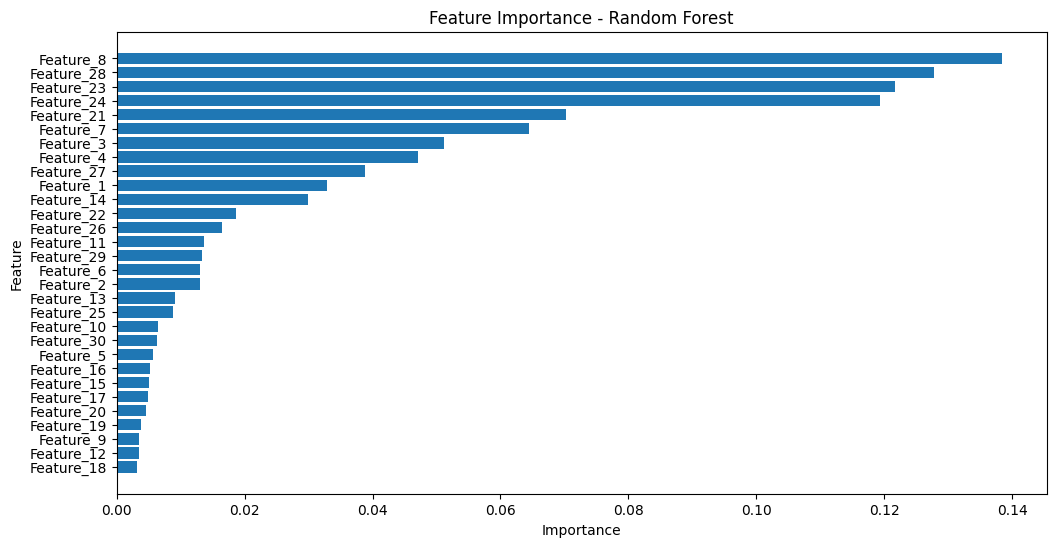

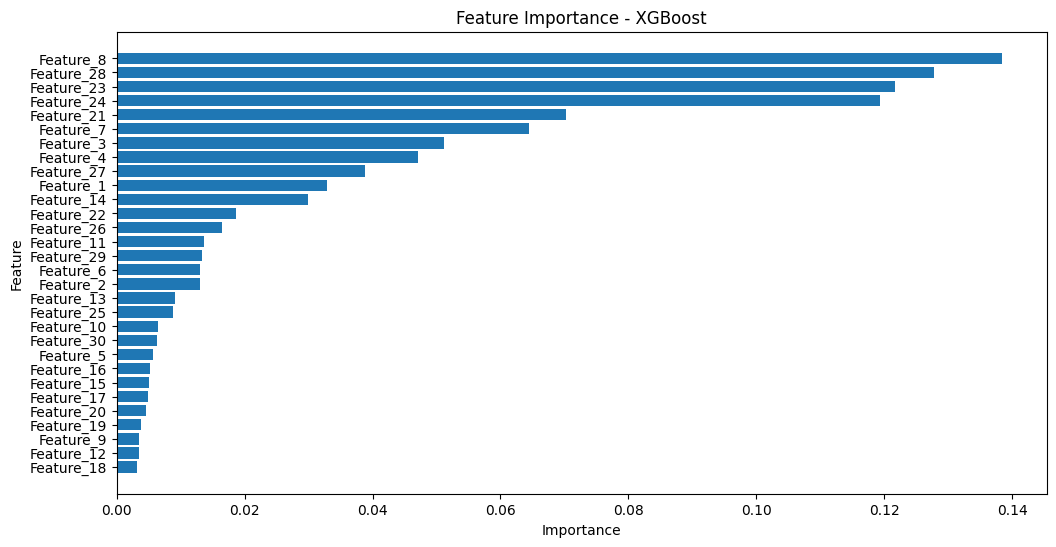

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the helper function to extract feature importance
def get_feature_importance(model, feature_names):
    if not hasattr(model, "feature_importances_"):
        raise ValueError(f"{model.__class__.__name__} model has no feature_importances_. Ensure it is trained.")

    importances = model.feature_importances_

    if len(importances) != len(feature_names):
        raise ValueError(f"Mismatch: {len(importances)} importances vs {len(feature_names)} features.")

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    return importance_df.sort_values(by='Importance', ascending=False)

# Ensure X is a Pandas DataFrame with correct feature names
if not isinstance(X, pd.DataFrame):
    feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
    X = pd.DataFrame(X, columns=feature_names)

# Print feature count checks
print(f"Feature count in X: {X.shape[1]}")

# Get feature importance for each model
dt_importance = get_feature_importance(best_dt_model, X.columns)
rf_importance = get_feature_importance(best_rf_model, X.columns)
xgb_importance = get_feature_importance(best_xgb_model, X.columns)

# Display top 10 features for each model
print("\nDecision Tree Top 10 Features:\n", dt_importance.head(10))
print("\nRandom Forest Top 10 Features:\n", rf_importance.head(10))
print("\nXGBoost Top 10 Features:\n", xgb_importance.head(10))

# Function to plot feature importance for all features
def plot_feature_importance(importances, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.barh(importances['Feature'], importances['Importance'], align="center")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
    plt.show()

# Plot feature importance for all features
plot_feature_importance(dt_importance, "Feature Importance - Decision Tree")
plot_feature_importance(rf_importance, "Feature Importance - Random Forest")
plot_feature_importance(xgb_importance, "Feature Importance - XGBoost")



Decision Tree Top 10 Features:
       Feature  Importance
7    Feature_8    0.719701
21  Feature_22    0.119998
20  Feature_21    0.040313
23  Feature_24    0.037373
22  Feature_23    0.031252
11  Feature_12    0.024793
13  Feature_14    0.013829
24  Feature_25    0.010698
14  Feature_15    0.002044
19  Feature_20    0.000000

Random Forest Top 10 Features:
       Feature  Importance
7    Feature_8    0.138475
27  Feature_28    0.127745
22  Feature_23    0.121634
23  Feature_24    0.119309
20  Feature_21    0.070202
6    Feature_7    0.064397
2    Feature_3    0.051214
3    Feature_4    0.047101
26  Feature_27    0.038899
0    Feature_1    0.032929

XGBoost Top 10 Features:
       Feature  Importance
7    Feature_8    0.138475
27  Feature_28    0.127745
22  Feature_23    0.121634
23  Feature_24    0.119309
20  Feature_21    0.070202
6    Feature_7    0.064397
2    Feature_3    0.051214
3    Feature_4    0.047101
26  Feature_27    0.038899
0    Feature_1    0.032929


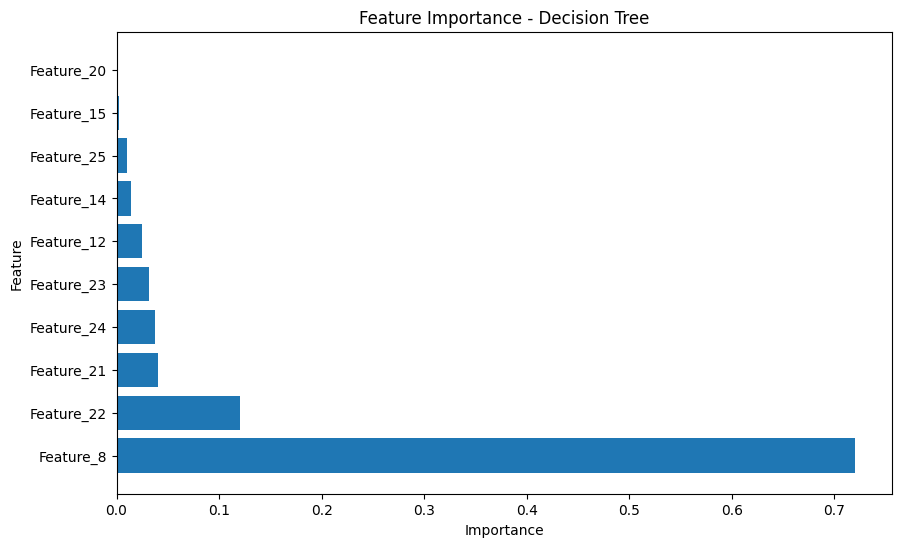

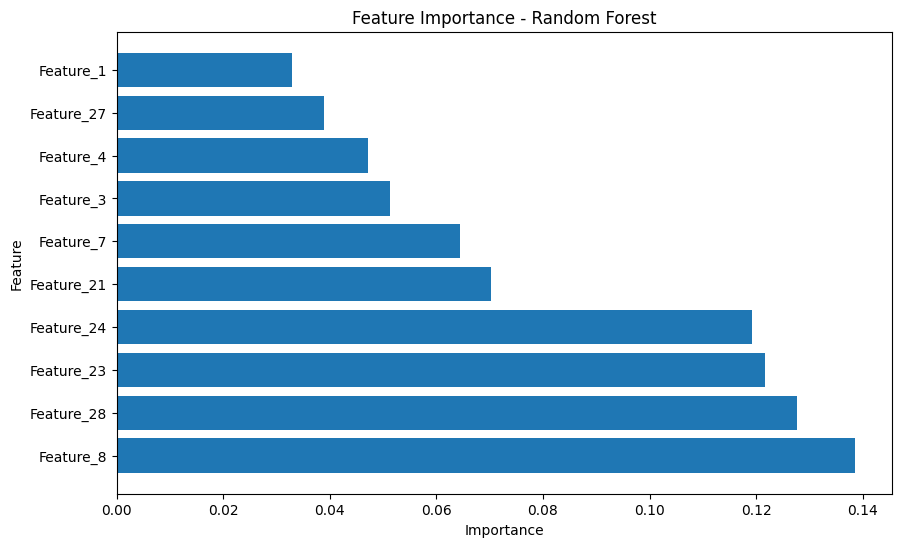

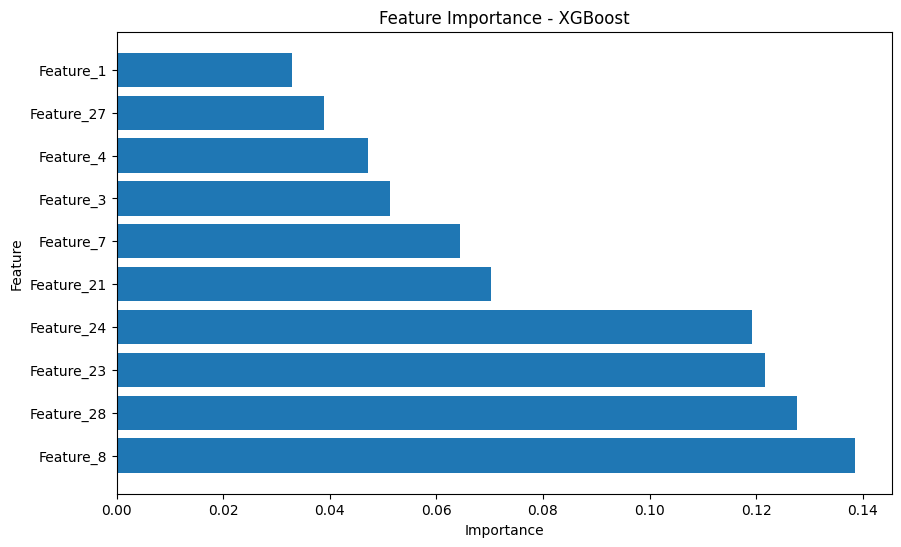

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the helper function to extract feature importance
def get_feature_importance(model, feature_names):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    return importance_df.sort_values(by='Importance', ascending=False)

# Ensure X is a Pandas DataFrame
if not isinstance(X, pd.DataFrame):
    feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
    X = pd.DataFrame(X, columns=feature_names)

# Get feature importance for each model
dt_importance = get_feature_importance(best_dt_model, X.columns)
rf_importance = get_feature_importance(best_rf_model, X.columns)
xgb_importance = get_feature_importance(best_xgb_model, X.columns)

# Display top 10 features for each model
print("\nDecision Tree Top 10 Features:")
print(dt_importance.head(10))

print("\nRandom Forest Top 10 Features:")
print(rf_importance.head(10))

print("\nXGBoost Top 10 Features:")
print(xgb_importance.head(10))

# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.barh(dt_importance['Feature'][:10], dt_importance['Importance'][:10], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.barh(rf_importance['Feature'][:10], rf_importance['Importance'][:10], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - XGBoost")
plt.barh(xgb_importance['Feature'][:10], xgb_importance['Importance'][:10], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


#**Re TRAIN Models**

In [ ]:
# Extract top 10 features for each model
top_10_features_dt = dt_importance['Feature'][:10].tolist()
top_10_features_rf = rf_importance['Feature'][:10].tolist()
top_10_features_xgb = xgb_importance['Feature'][:10].tolist()

# Ensure selected features exist in X_train and X_test
top_10_features_dt = [feat for feat in top_10_features_dt if feat in X_train.columns]
top_10_features_rf = [feat for feat in top_10_features_rf if feat in X_train.columns]
top_10_features_xgb = [feat for feat in top_10_features_xgb if feat in X_train.columns]

# Select corresponding features from X_train and X_test
X_train_dt = X_train[top_10_features_dt]
X_test_dt = X_test[top_10_features_dt]

X_train_rf = X_train[top_10_features_rf]
X_test_rf = X_test[top_10_features_rf]

X_train_xgb = X_train[top_10_features_xgb]
X_test_xgb = X_test[top_10_features_xgb]




Top 10 Features for Decision Tree: ['Feature_22', 'Feature_21', 'Feature_23', 'Feature_12', 'Feature_14', 'Feature_20']
Top 10 Features for Random Forest: ['Feature_28', 'Feature_23', 'Feature_21', 'Feature_7', 'Feature_3', 'Feature_1']
Top 10 Features for XGBoost: ['Feature_28', 'Feature_23', 'Feature_21', 'Feature_7', 'Feature_3', 'Feature_1']


In [ ]:
# Retrain each model on its respective top 10 features
best_dt_model.fit(X_train_dt, y_train)
best_rf_model.fit(X_train_rf, y_train)
best_xgb_model.fit(X_train_xgb, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Define an evaluation function
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n{name} Performance (Top 10 Features):")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")
    print(classification_report(y_test, y_pred))

# Evaluate each model separately
evaluate_model(best_dt_model, X_test_dt, y_test, "Decision Tree")
evaluate_model(best_rf_model, X_test_rf, y_test, "Random Forest")
evaluate_model(best_xgb_model, X_test_xgb, y_test, "XGBoost")



Decision Tree Performance (Top 10 Features):
Accuracy: 0.90
ROC AUC: 0.90
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.93      0.92      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114


Random Forest Performance (Top 10 Features):
Accuracy: 0.96
ROC AUC: 0.99
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


XGBoost Performance (Top 10 Features):
Accuracy: 0.96
ROC AUC: 0.99
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1      